In [1]:
!pip install scikit-learn pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable


## 1. Load and explore the data

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000  

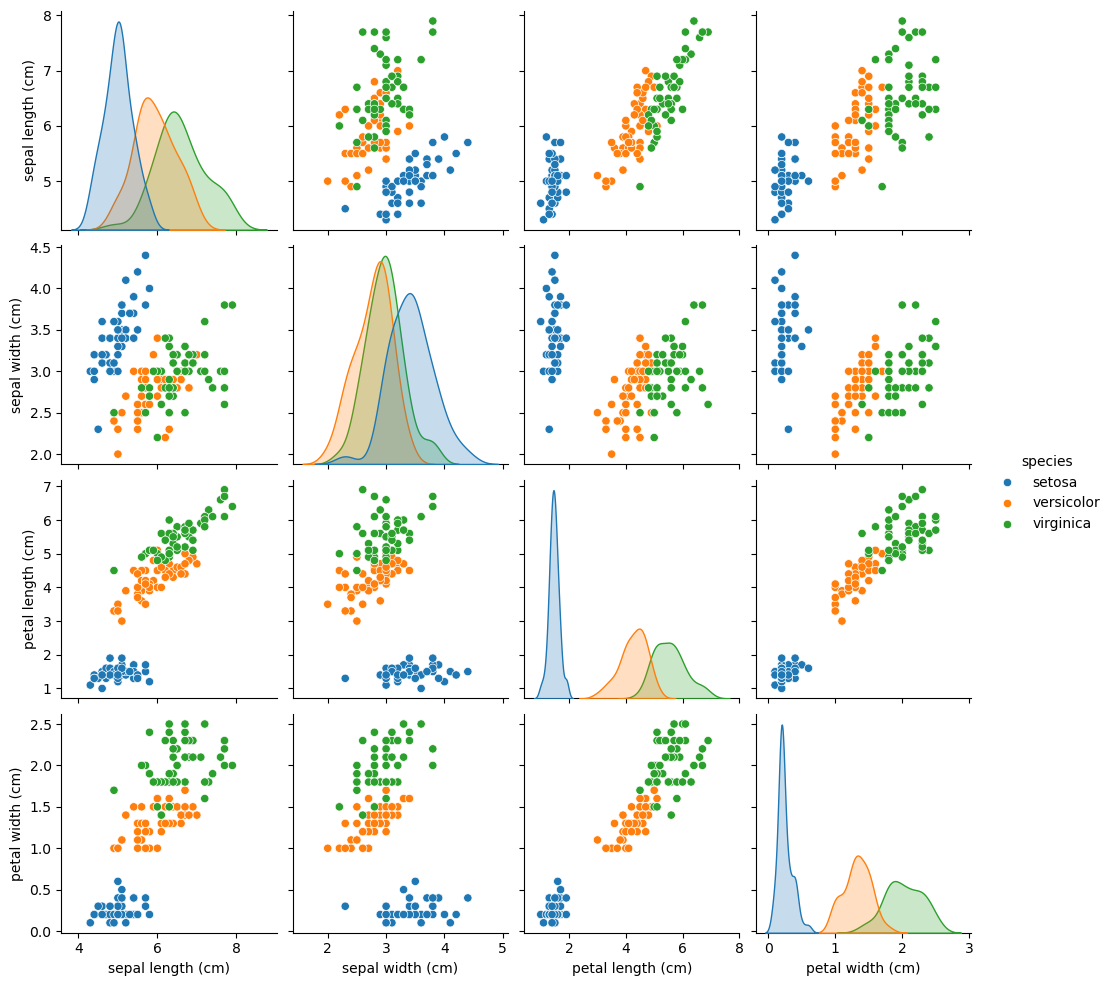

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Explore the data
print(df.head())
print(df.describe())

# Visualizing data
sns.pairplot(df, hue='species')
plt.show()

### 2. Preprocess the data

In [3]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = iris.data
y = iris.target

# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### By k-Nearest-Neighbours

In [9]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### By Decision tree

In [5]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [6]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Make predictions
y_pred = knn.predict(X_test)  # or tree.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


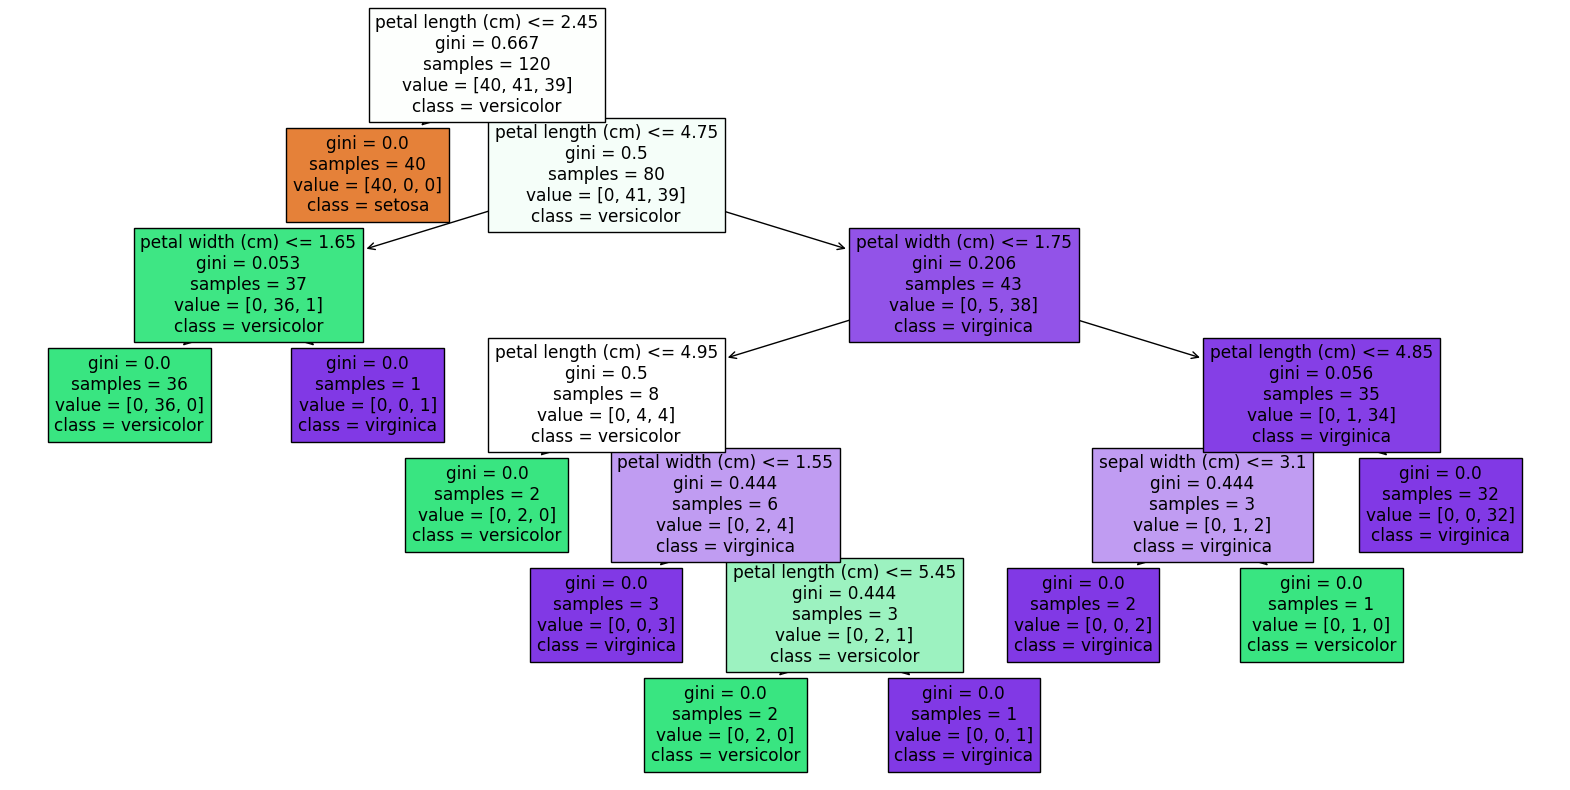

In [7]:
# Decision tree result
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

In [10]:
# Prediction on new data
# Ex: new measurements (sepal length, sepal width, petal length, petal width)
new_flower = [[5.1, 3.5, 1.4, 0.2]]
prediction = knn.predict(new_flower)
print("Predicted species:", iris.target_names[prediction[0]])

Predicted species: setosa
